<a href="https://colab.research.google.com/github/Uniqueprogrammer/FMML-project-and-labs/blob/main/AIML_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is

*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [ ]:
  import numpy as np
  import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

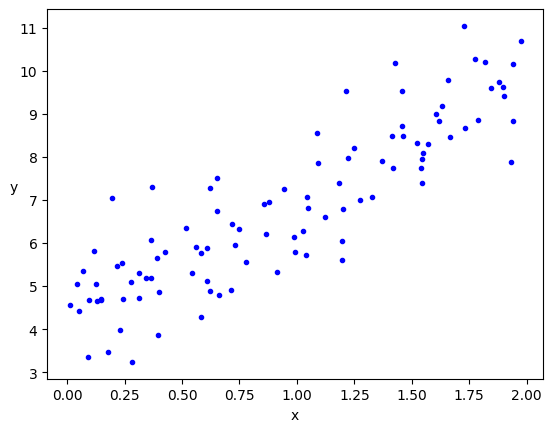

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.196
y_pred[1]: 2.787
Final error: 4033.488


Plotting the error vs Number of iterations

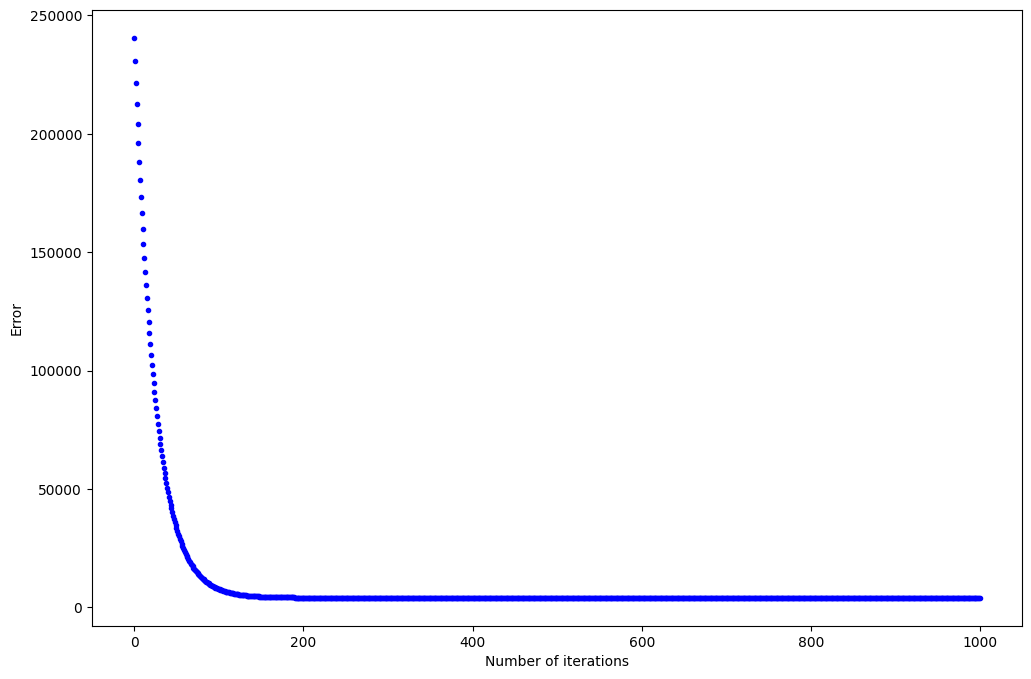

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

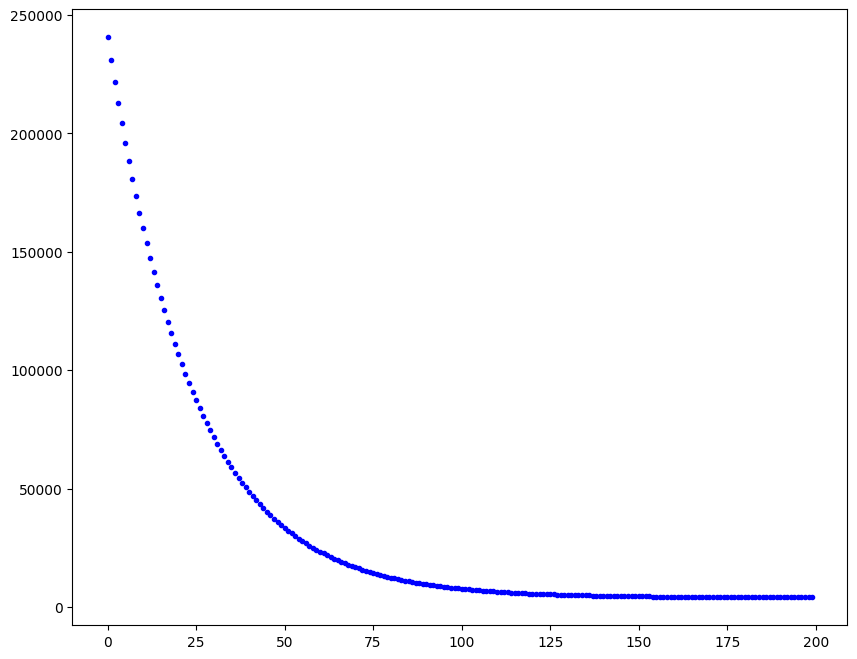

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += 0.5 * ((prediction - y_i) ** 2)

        cost_history[it] = cost.sum()

    return y_pred, cost_history

In [ ]:
# Load Iris dataset
iris = datasets.load_iris()
X_real = iris.data[:, 0].reshape(-1, 1)  # Using the first feature for simplicity
y_real = iris.target.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X_real = scaler.fit_transform(X_real)

# Initialize parameters (as a 1D array)
y_pred = np.random.randn(1, 1)


In [ ]:
lr = 0.01
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 0.953
y_pred[1]: 3.477
Final error: 406.128


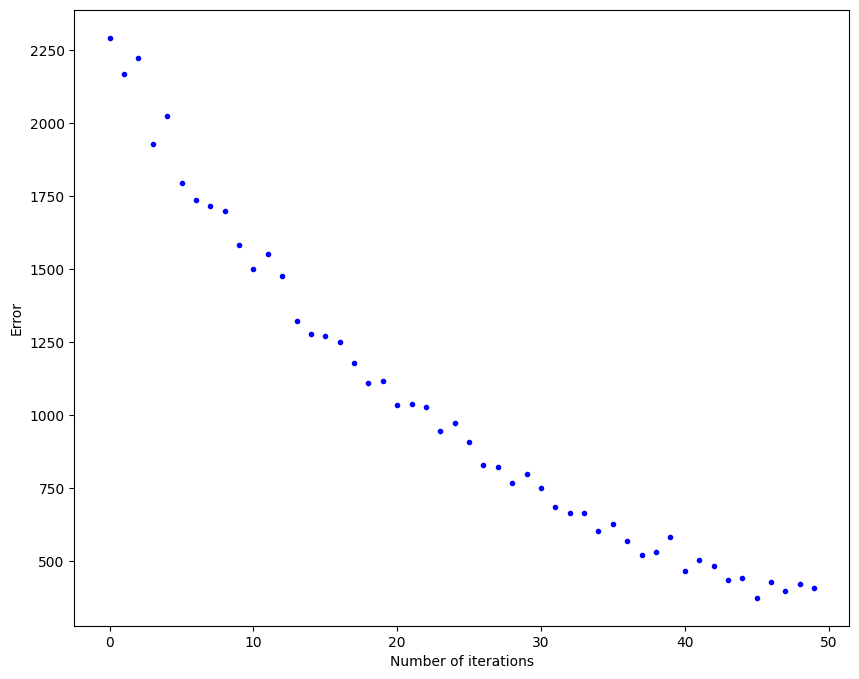

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            # cost += cal_cost(y_pred, X_i, y_i)
            cost += 0.5 * np.sum((prediction - y_i) ** 2)


        cost_history[it]  = cost


    return y_pred, cost_history

In [ ]:
# Load Iris dataset
iris = datasets.load_iris()
X_real = iris.data[:, 0].reshape(-1, 1)  # Using the first feature for simplicity
y_real = iris.target.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X_real = scaler.fit_transform(X_real)

# Initialize parameters (as a 1D array)
y_pred = np.random.randn(2, 1)

In [ ]:
lr = 0.01
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('Final predictions:\n', y_pred_real)
print('Final error: {:0.3f}'.format(cost_history_real[-1]))

# print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
# print('Final error: {:0.3f}'.format(cost_history[-1]))

Final predictions:
 [[0.99956978]
 [0.63933143]]
Final error: 19.401


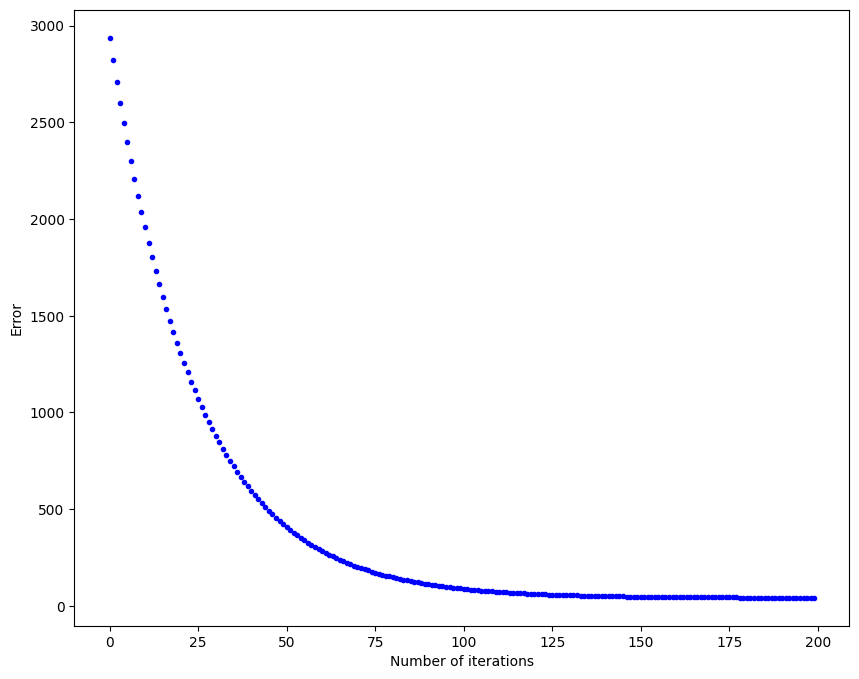

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

1]  for the first question i have changed the batch_size to 10 and 100

observations: Smaller batch sizes often introduce more randomness and noise into the learning process.The learning process may be more erratic, but it can potentially converge faster. There might be more fluctuations in the cost function.

Larger batch sizes can result in a smoother convergence process.
The learning process may be more stable, with less erratic behavior. However, larger batch sizes typically require more computation per iteration.

2] a]Trying batch gradient decent with iris dataset. The Iris dataset contains measurements of 50 flowers from three different species. The dataset contains four features of each flower: Sepal length, Sepal width, Petal length, Petal width.


Final predictions:
 [[0.99995683]
 [0.63893099]]
Final error: 0.129


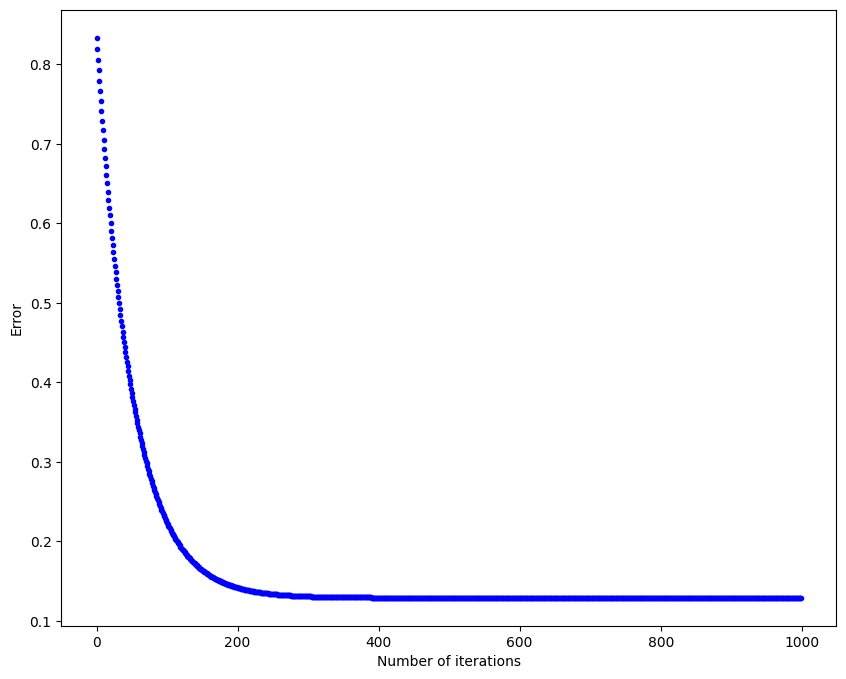

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X_real = iris.data[:, 0].reshape(-1, 1)  # Using the first feature for simplicity
y_real = iris.target.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X_real = scaler.fit_transform(X_real)

# Add a column of ones for the intercept term
X_real = np.hstack((np.ones((X_real.shape[0], 1)), X_real))

# Function for Batch Gradient Descent
def batch_gradient_descent(X, y, y_pred, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = X.dot(y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost = 0.5 * np.mean((prediction - y) ** 2)
        cost_history[it] = cost

    return y_pred, cost_history

# Initializations
lr = 0.01
n_iter = 1000
y_pred_real, cost_history_real = batch_gradient_descent(X_real, y_real, np.zeros((X_real.shape[1], 1)), lr, n_iter)

# Analyze and document findings
# You can plot the cost history or print the final predictions and errors
print('Final predictions:\n', y_pred_real)
print('Final error: {:0.3f}'.format(cost_history_real[-1]))

# Plot cost history
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history_real, 'b.')
plt.show()


b] trying iris dataset on Stochastic Gradient Descent

Final predictions:
 [[0.63852539]]
Final error: 84.833


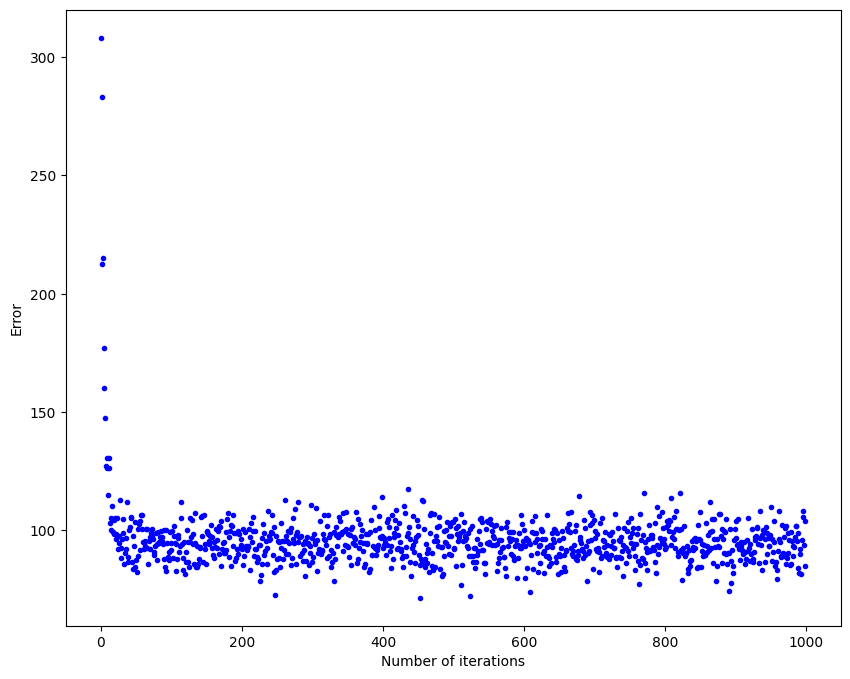

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Stochastic Gradient Descent function
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += 0.5 * ((prediction - y_i) ** 2)

        cost_history[it] = cost.sum()

    return y_pred, cost_history

# Load Iris dataset
iris = datasets.load_iris()
X_real = iris.data[:, 0].reshape(-1, 1)  # Using the first feature for simplicity
y_real = iris.target.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X_real = scaler.fit_transform(X_real)

# Initialize parameters (as a 1D array)
y_pred = np.random.randn(1, 1)

# Apply Stochastic Gradient Descent on real dataset
lr = 0.1
n_iter = 1000
y_pred_real, cost_history_real = stochastic_gradient_descent(X_real, y_real, y_pred, lr, n_iter)

# Analyze and document findings
# You can print the final predictions and errors or plot the cost history
print('Final predictions:\n', y_pred_real)
print('Final error: {:0.3f}'.format(cost_history_real[-1]))

# Plot cost history
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history_real, 'b.')
plt.show()


c] for the mini-batch GD with iris dataset i have made changes in the existing code.

3]for the third assignment question i have taken learning rate as 0.1 in all the three algorithms and plotted a graph on their convergence comparison

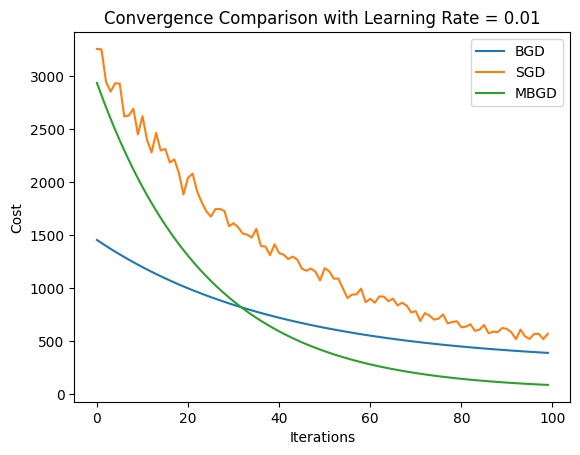

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the cost history for each algorithm (bgd_costs, sgd_costs, mbgd_costs)
# Make sure all cost histories have the same length (number of iterations)

iterations = len(bgd_costs)  # Assuming bgd_costs is available

plt.plot(range(iterations), bgd_costs, label='BGD')
plt.plot(range(iterations), sgd_costs, label='SGD')
plt.plot(range(iterations), mbgd_costs[:iterations], label='MBGD')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence Comparison with Learning Rate = 0.01')
plt.legend()
plt.show()
